# GAIA Clustering & Analysis
#### -------------------------------------------------------------------------
## Data importation from **.vot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.append('C:\\Users\Quentin\\Documents\\ALMA_CHILI\\gaia-shock\\src')

## directory
rootdir = r'C:\Users\Quentin\Documents\ALMA_CHILI'
wdir    = r'%s\products'%(rootdir)
#notedir = r'%s\gaia-shock\notebooks_Quentin'%(rootdir)

os.chdir(wdir)  # to change the current directory

import gaia_utils_quentin as gu

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [8]:
name_list = ["M67", "NGC2516", "NGC752", "NGC1039", "NGC1342", "NGC1647"]
clustername = "NGC752"
RADIUS       = 3.
errtol       = 0.10
weight       = [6,1,1,3,3,3,3,3];  weight=weight/np.max(weight)
eps          = 0.15
min_samples  = 15

In [9]:
source = gu.source(clustername, RADIUS, errtol)
source.read_votable()
source.convert_filter_data()
#source.convert_to_cartesian()

## NGC752-3.0deg-0.1err.vot read...
## Total stars: 27683

## Conversion done...
## Stars selected: 26760


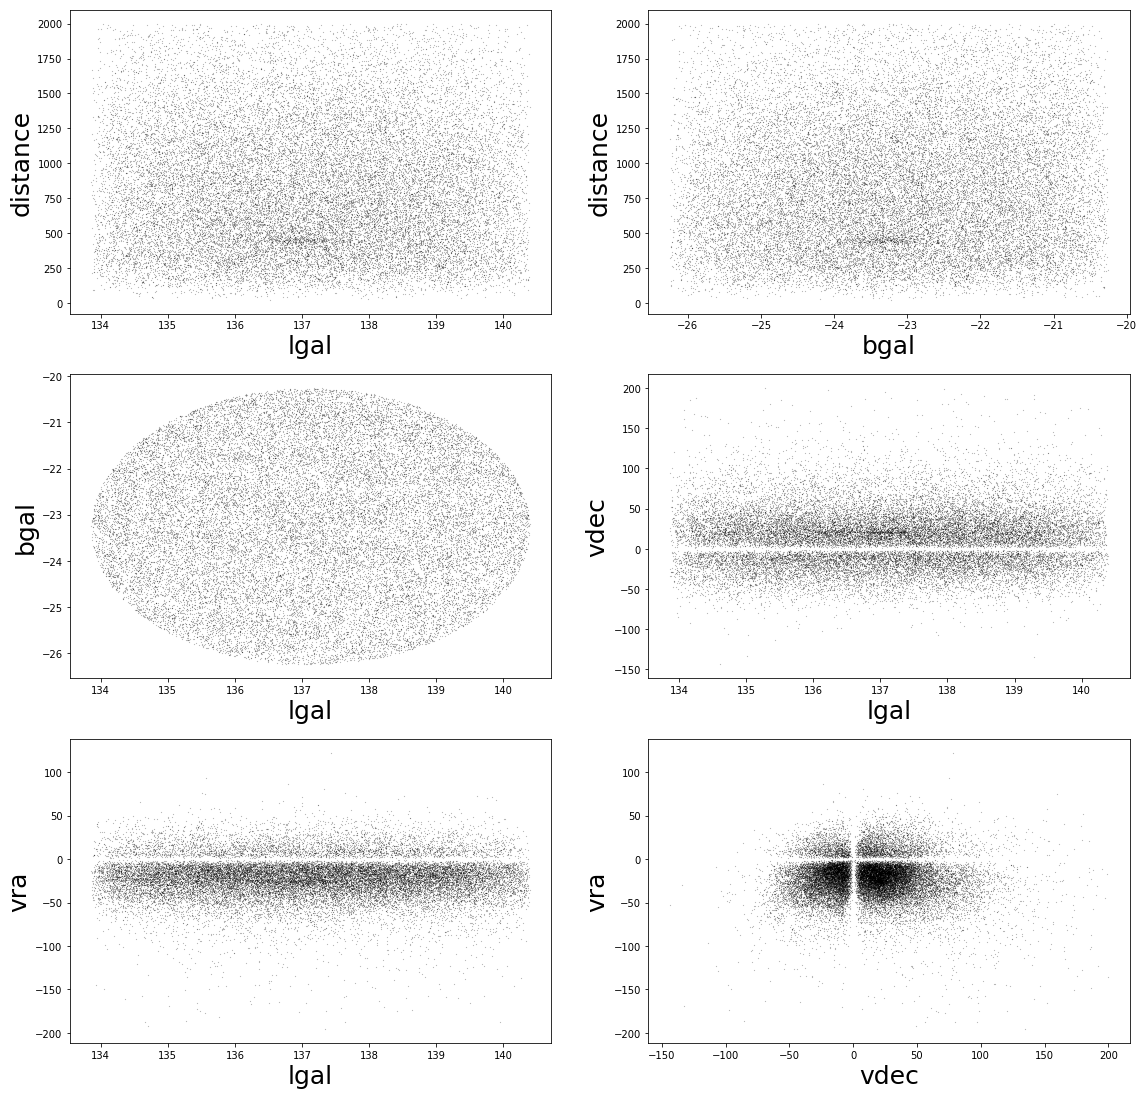

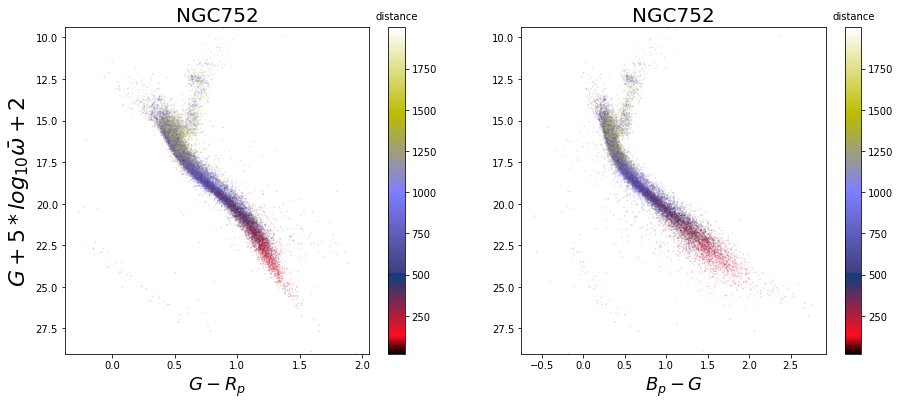

In [11]:
source.plot_information(0.01,False)
#source.plot_3D(0.01,True)

#### -------------------------------------------------------------
### Normalisation

## Normalization done on filtered data..
## Normalization done on filtered data..


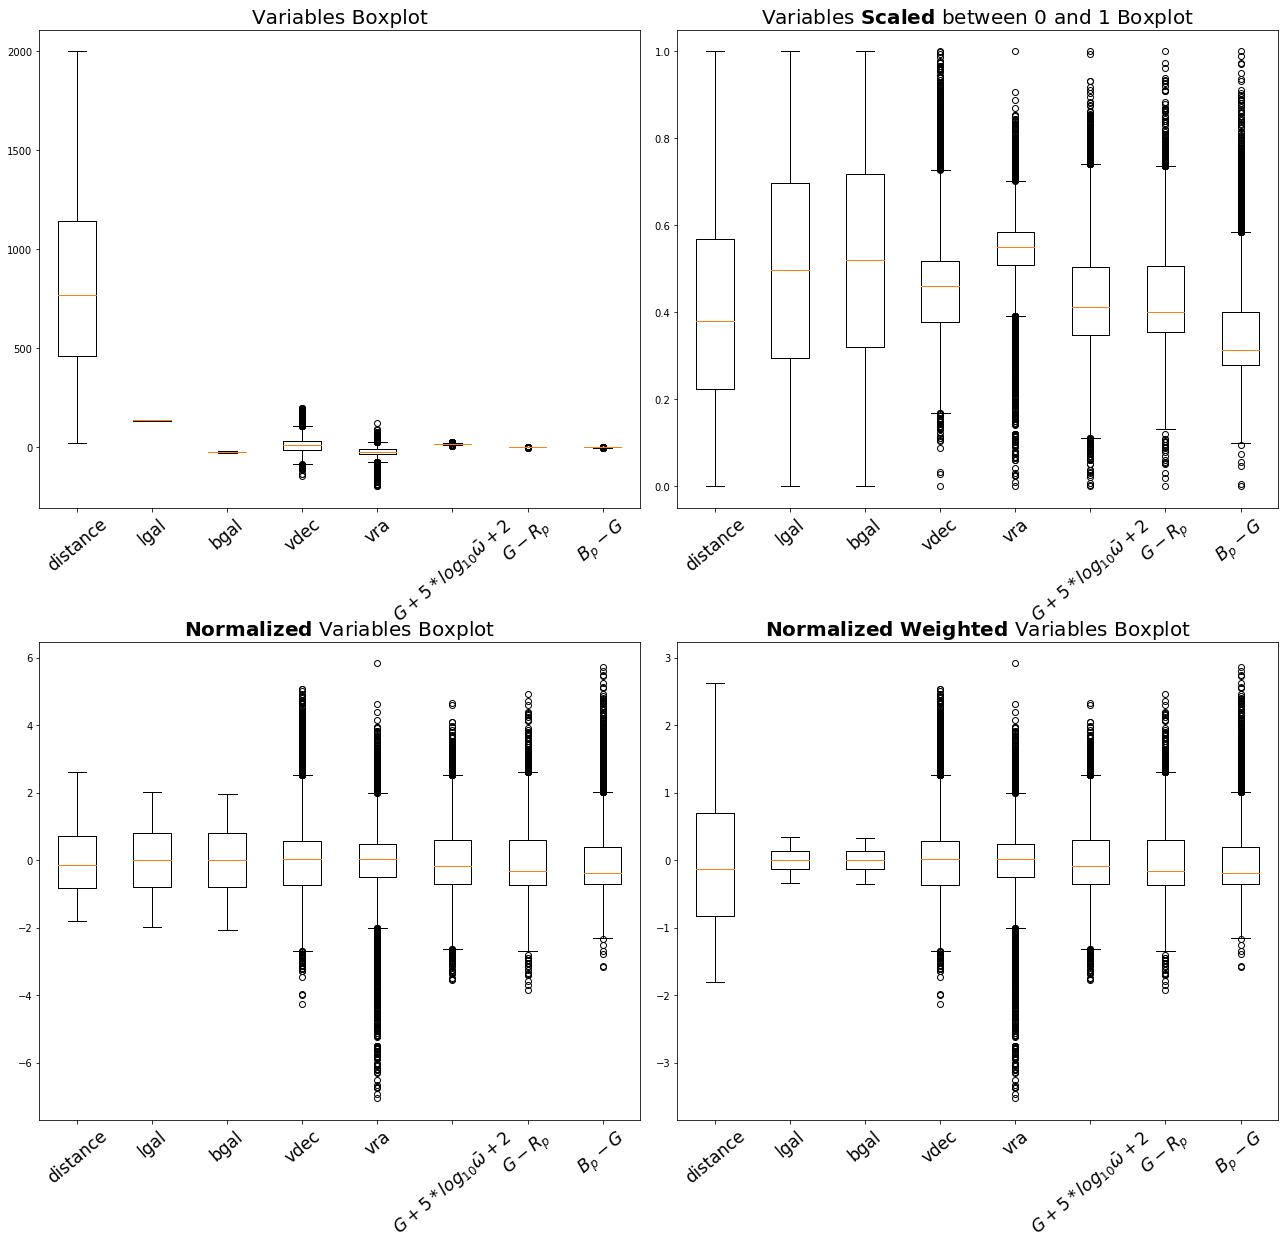

In [12]:
source.normalization_minmax()
plt.figure(figsize=(18,16))
plt.subplot(221)
plt.title("Variables Boxplot", fontsize=20)
plt.boxplot(source.df);
plt.xticks(np.arange(len(source.data_name))+1, source.data_name, rotation = 40, fontsize = 17)
plt.subplot(222)
plt.title(r'Variables $\bf{Scaled}$ between 0 and 1 Boxplot', fontsize=20)
plt.boxplot(source.dfnorm);
plt.xticks(np.arange(len(source.data_name))+1, source.data_name, rotation = 40, fontsize = 17)
plt.subplot(223); plt.tight_layout()
source.normalization_normal()
plt.title(r'$\bf{Normalized}$ Variables Boxplot', fontsize=20)
plt.boxplot(source.dfnorm);
plt.xticks(np.arange(len(source.data_name))+1, source.data_name, rotation = 40, fontsize = 17)
plt.subplot(224)
plt.title(r'$\bf{Normalized}$ $\bf{Weighted}$ Variables Boxplot', fontsize=20)
plt.boxplot(source.dfnorm*weight);
plt.xticks(np.arange(len(source.data_name))+1, source.data_name, rotation = 40, fontsize = 17)
plt.show()

# -------------------------------------------------------------
## DBSCAN Clustering Method

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import cluster
from sklearn import metrics

In [ ]:
# #############################################################################
# Compute DBSCAN
eps_ = [0.12,0.13,0.14,0.15,0.16,0.17]
min_samples_ = [10,15,20,30,40,50]
mat_nb_clusters = np.zeros((len(eps_),len(min_samples_)))
mat_max = np.zeros((len(eps_),len(min_samples_)))
for i in range(len(eps_)) :
    for j in range(len(min_samples_)) :
        db = DBSCAN(eps=eps_[i], min_samples=min_samples_[j]).fit(source.dfnorm*weight)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        mat_nb_clusters[i,j] = n_clusters_
        max_label = 0
        for n in range(n_clusters_) :
            ilabel = np.where(labels == n)[0]
            if len(ilabel) > max_label : max_label = len(ilabel)
        mat_max[i,j] = max_label
    print("Ok pour eps "+str(eps_[i]))

In [ ]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,10))

im = ax.imshow(mat_nb_clusters.T)
ax.set_xticks(np.arange(len(eps_)))
ax.set_yticks(np.arange(len(min_samples_)))
ax.set_xticklabels(eps_)
ax.set_yticklabels(min_samples_)
# Loop over data dimensions and create text annotations.
for i in range(len(eps_)):
    for j in range(len(min_samples_)):
        if mat_nb_clusters[i, j] == 1 : color = "salmon"
        else : color = "w" 
        text = ax.text(i, j, '%d'%mat_nb_clusters[i, j],
                       ha="center", va="center", color=color, fontproperties='bold')
ax.set_title("Number of clusters found with DBSCAN")
ax.set_xlabel("eps", fontsize = 18)
ax.set_ylabel("min_samples", fontsize = 18)
fig.tight_layout()

im = ax2.imshow(mat_max.T)
ax2.set_xticks(np.arange(len(eps_)))
ax2.set_yticks(np.arange(len(min_samples_)))
ax2.set_xticklabels(eps_)
ax2.set_yticklabels(min_samples_)
# Loop over data dimensions and create text annotations.
for i in range(len(eps_)):
    for j in range(len(min_samples_)):
        if mat_nb_clusters[i, j] == 1 : color = "r"
        else : color = "w" 
        text = ax2.text(i, j, '%d'%mat_max[i, j], ha="center", va="center", color=color)
ax2.set_title("Largest cluster size found with DBSCAN")
ax.set_xlabel("eps", fontsize = 18)
ax.set_ylabel("min_samples", fontsize = 18)
fig.tight_layout()

plt.show()

In [13]:
source.set_weight(weight)
source.normalization_normal()

ilabel = source.dbscan_labels(eps=0.15, min_samples=15, display=True)

## Normalization done on filtered data..
3 clusters, size of the largest: 143


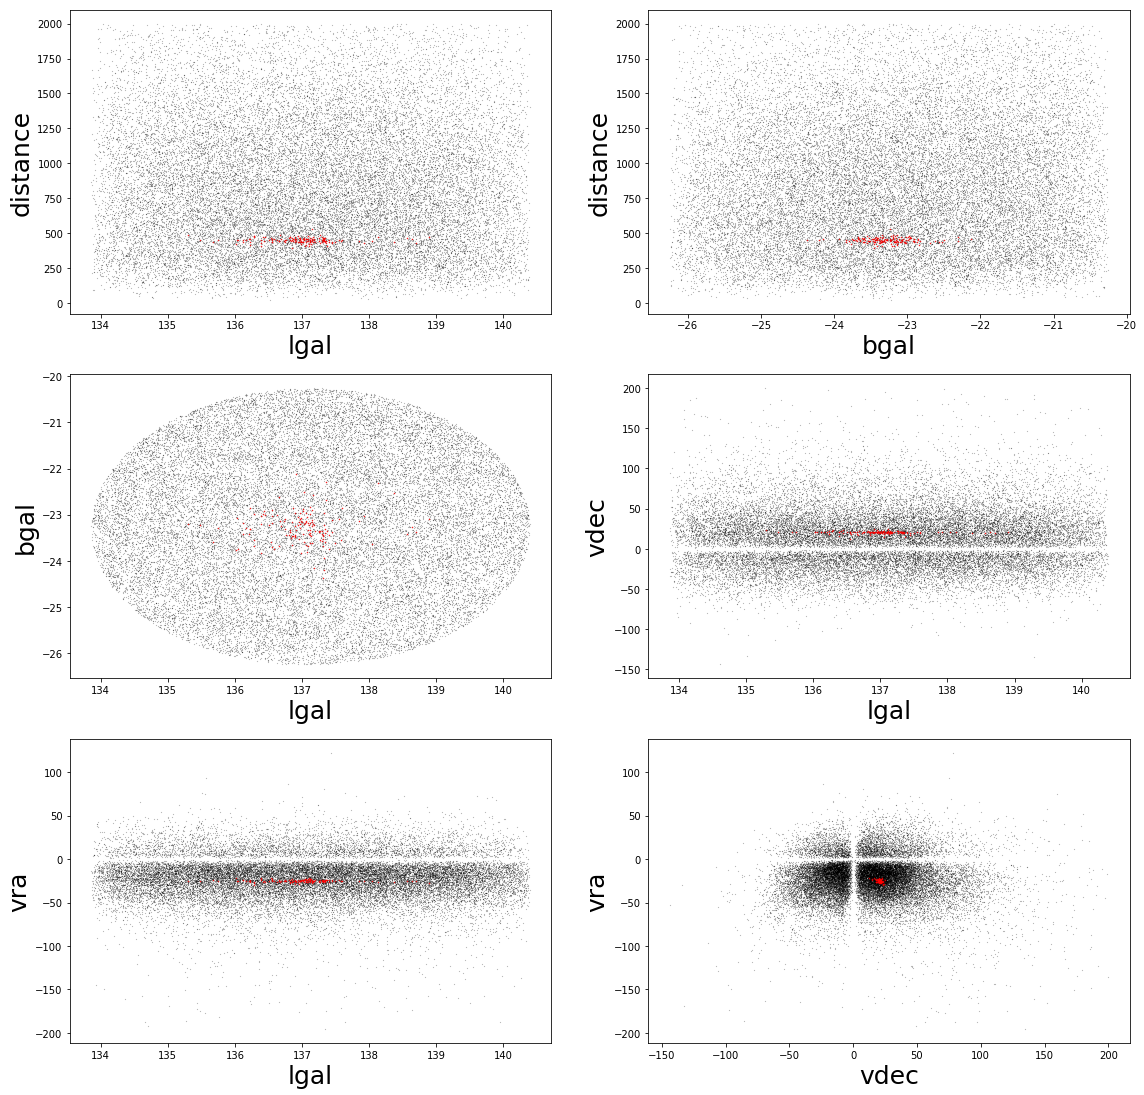

In [14]:
source.plot_information(0.01,False, HRD=False, ilabel=ilabel)

In [ ]:
#source.plot_information(0.001,True, HRD=False, ilabel=ilabel)
#source.plot_3D(0.01,True,(0,6,5),ilabel=ilabel)

For NGC2516
## NGC2516-3.0deg-0.1err.vot read...
## Total stars: 79407

## Conversion done...
## Stars selected: 66786
## Normalization done on filtered data..
9 clusters, size of the largest: 2628


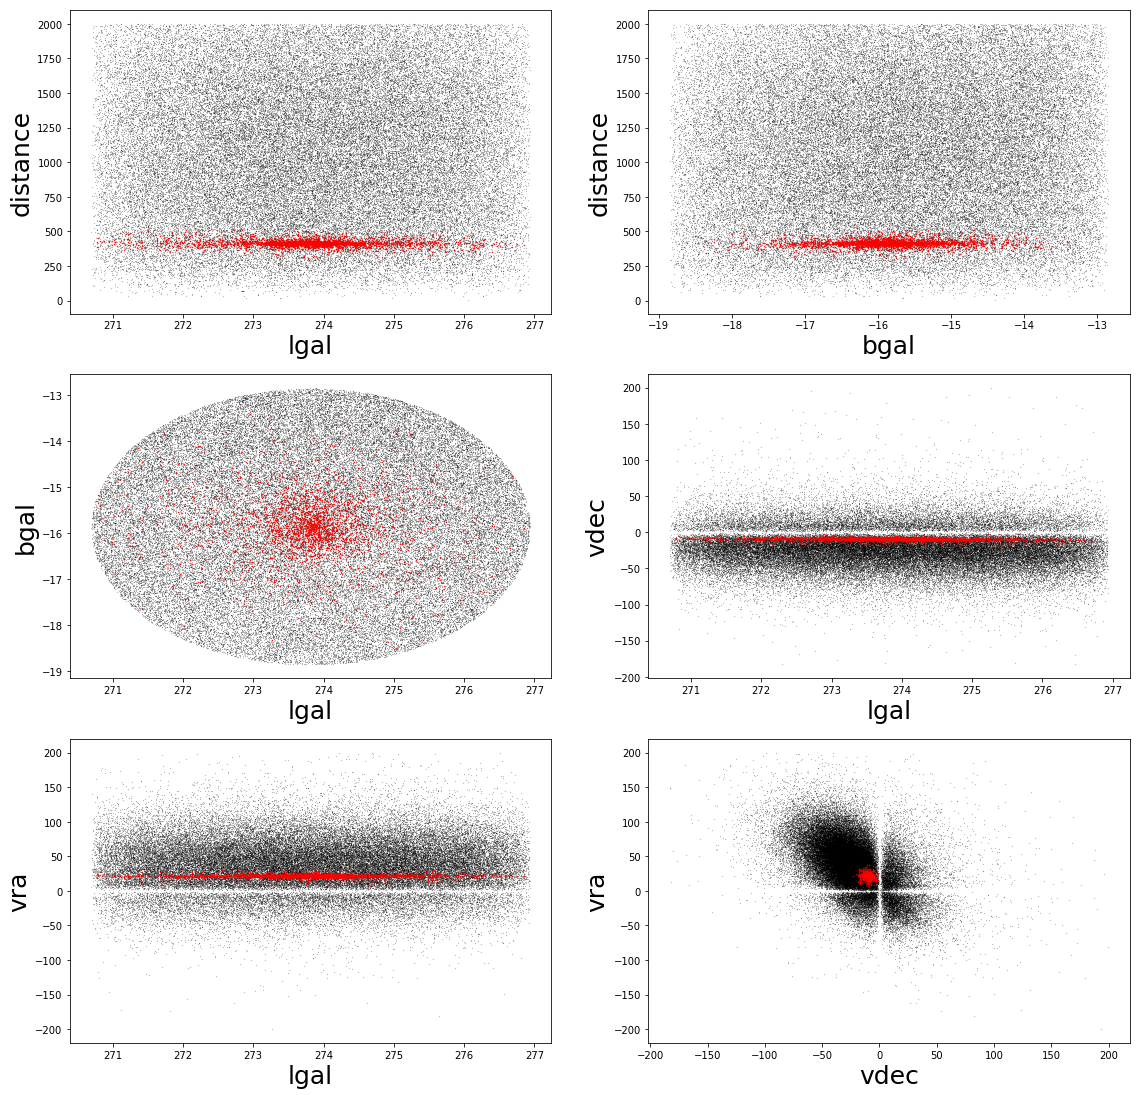

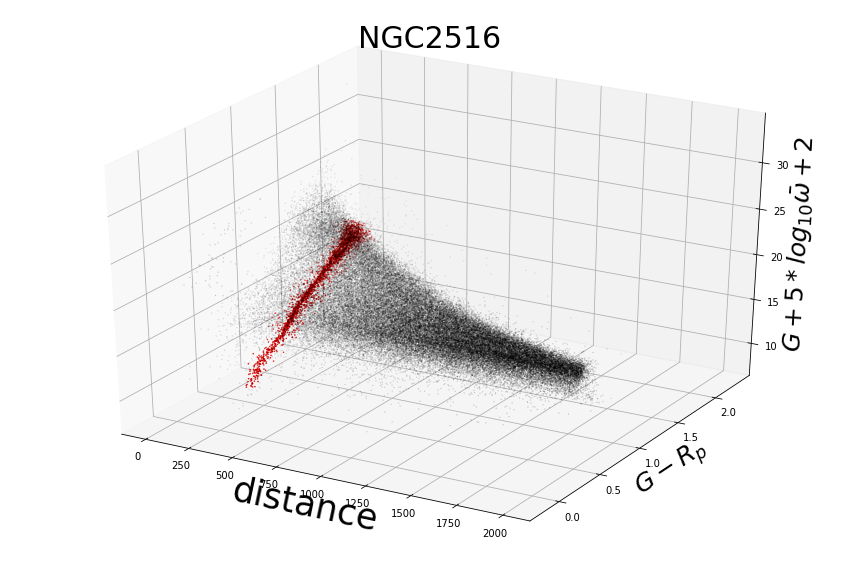

For NGC752
## NGC752-3.0deg-0.1err.vot read...
## Total stars: 27683

## Conversion done...
## Stars selected: 26760
## Normalization done on filtered data..
3 clusters, size of the largest: 211


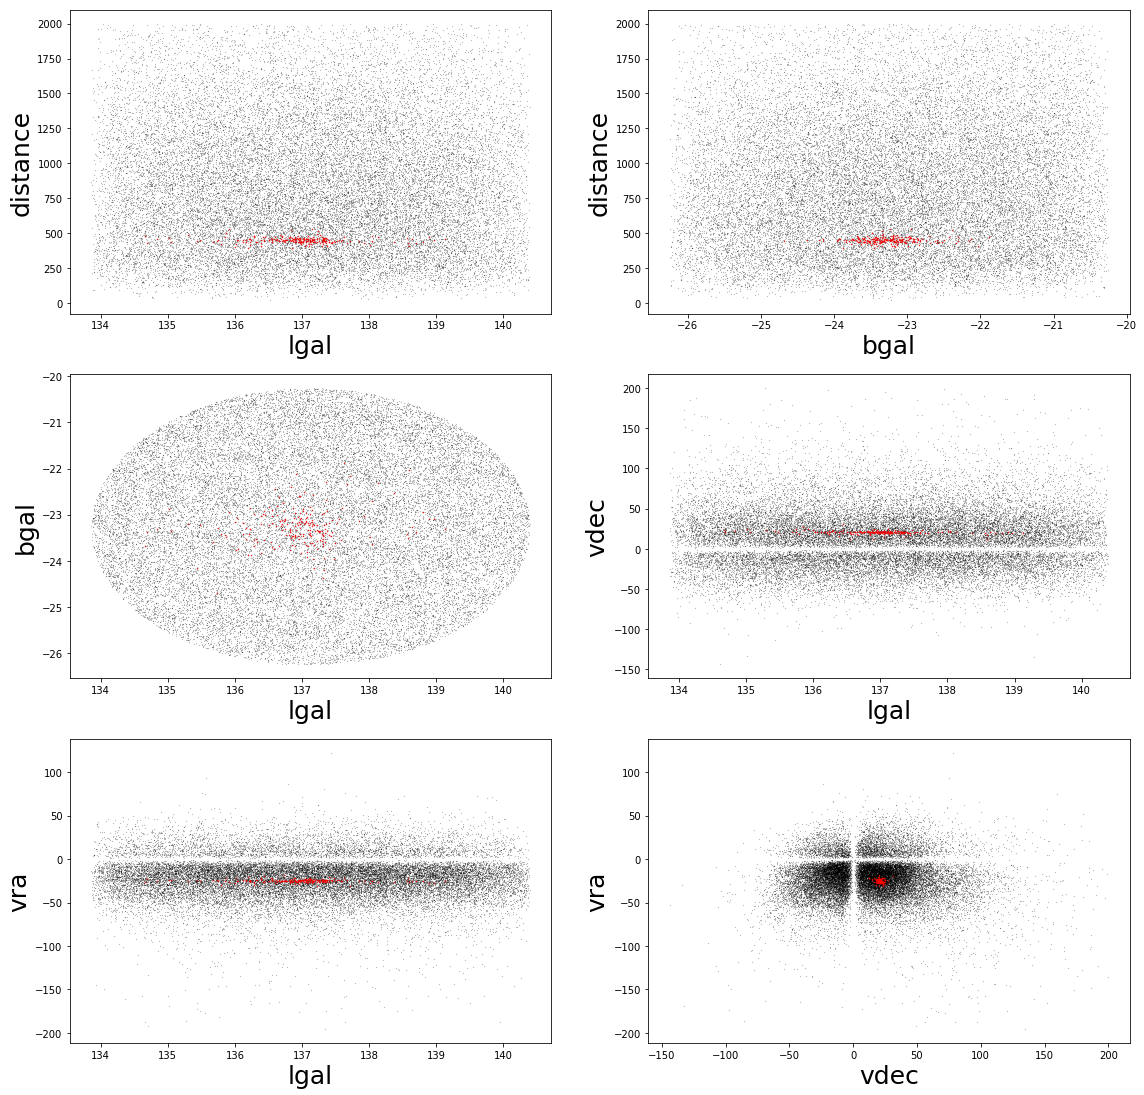

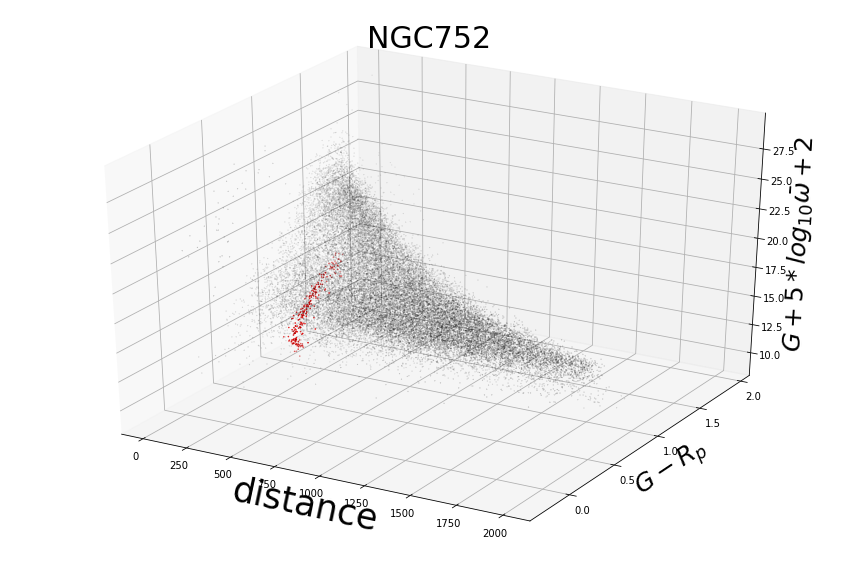

For NGC1039
## NGC1039-3.0deg-0.1err.vot read...
## Total stars: 30131

## Conversion done...
## Stars selected: 29200
## Normalization done on filtered data..
1 clusters, size of the largest: 152


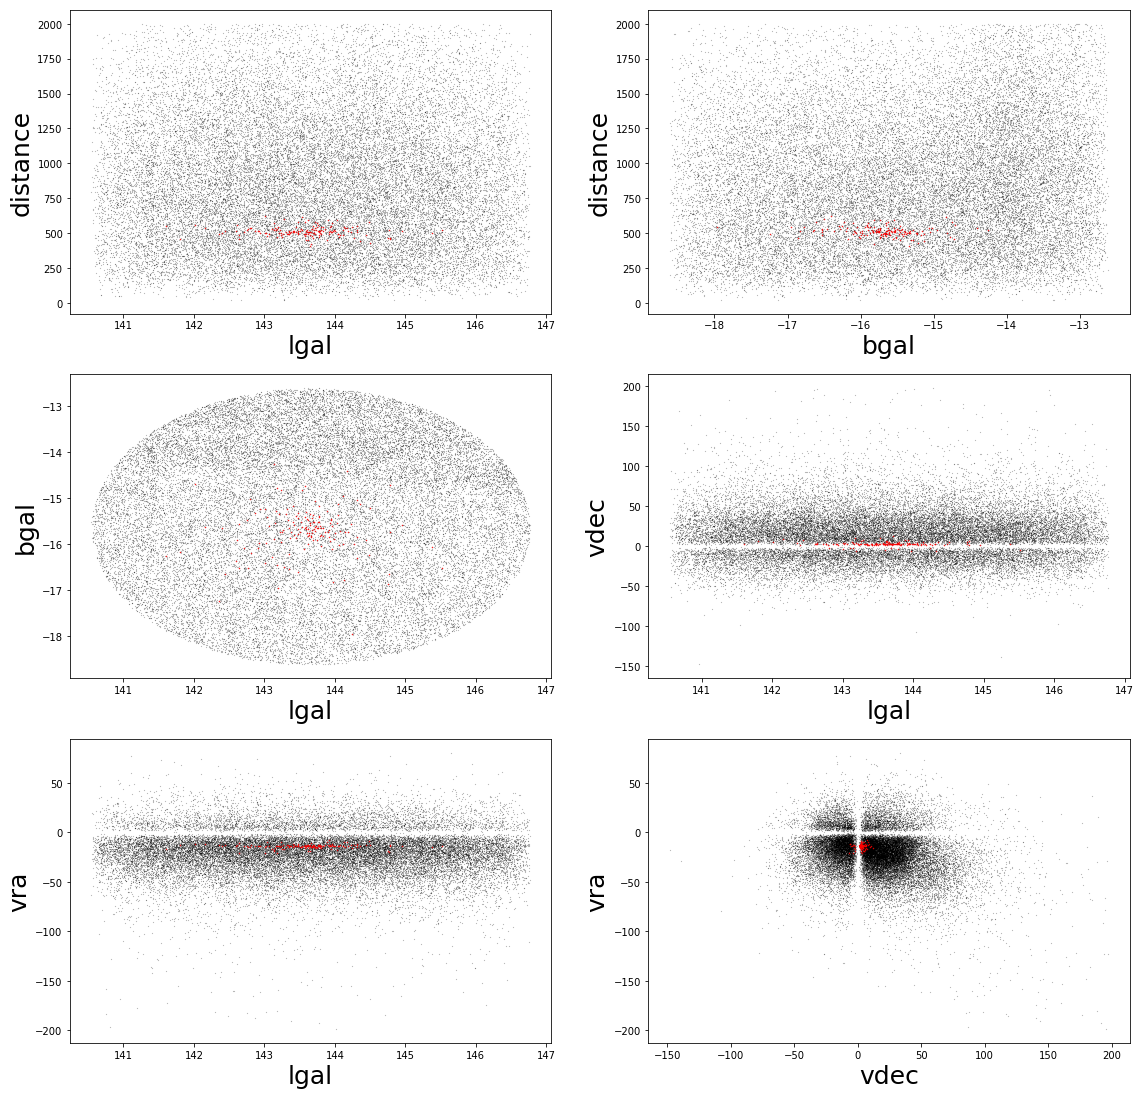

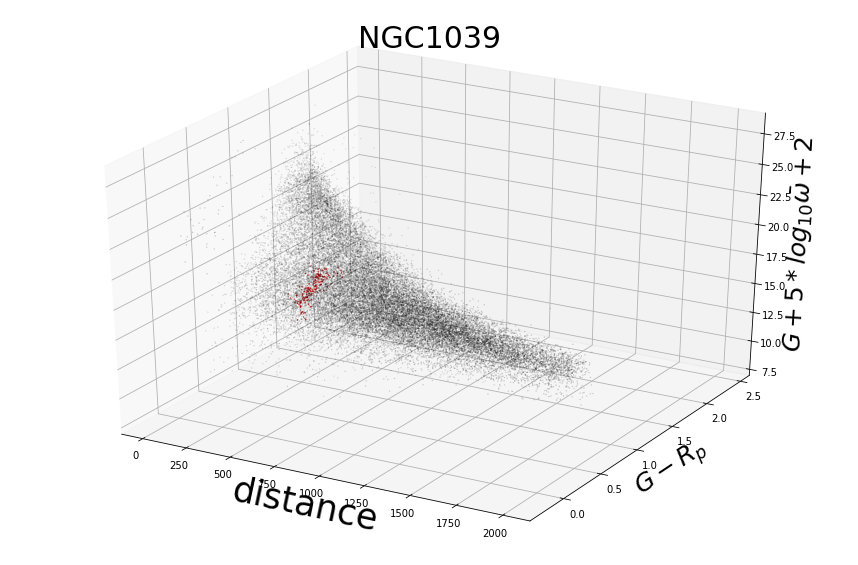

For NGC1342
## NGC1342-3.0deg-0.1err.vot read...
## Total stars: 29531

## Conversion done...
## Stars selected: 28090
## Normalization done on filtered data..
1 clusters, size of the largest: 17


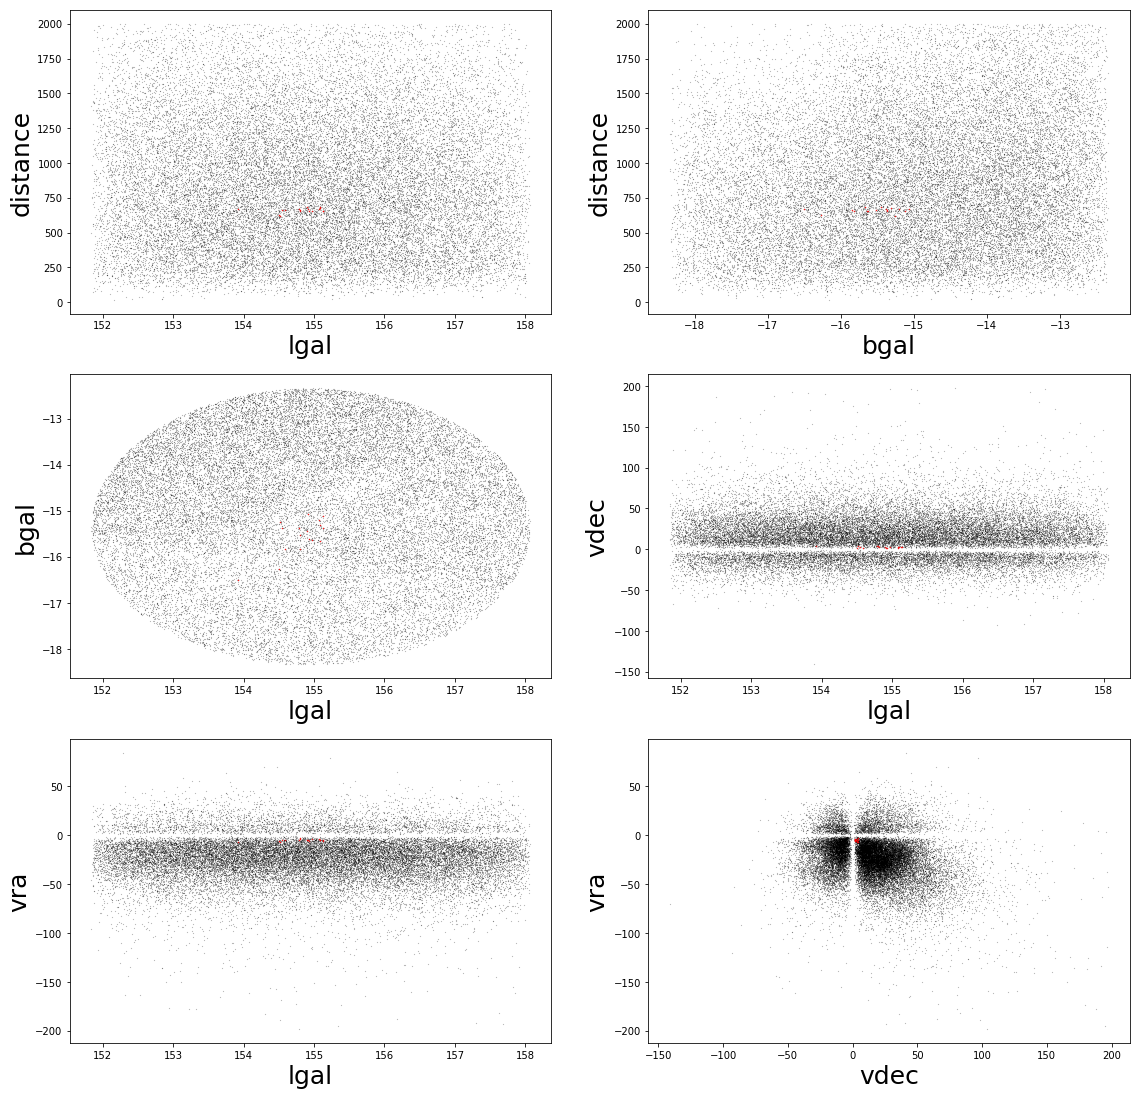

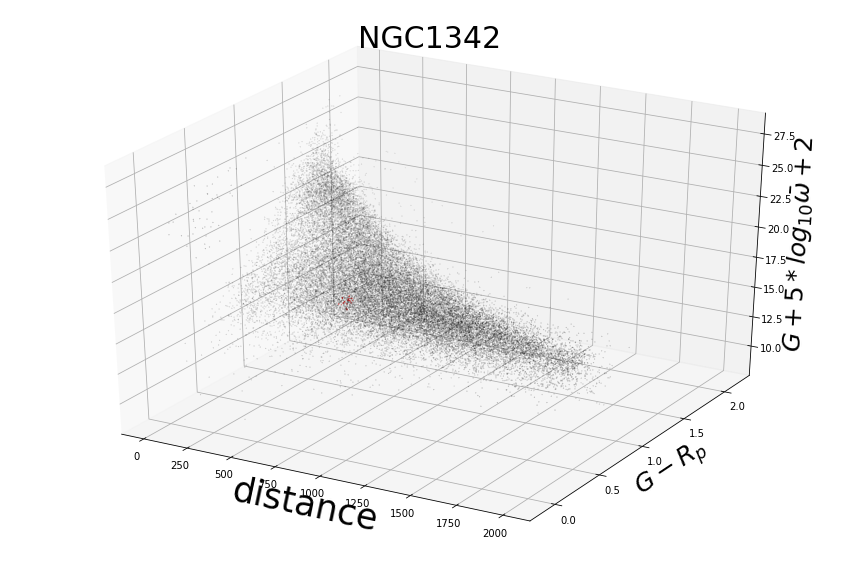

For NGC1647
## NGC1647-3.0deg-0.1err.vot read...
## Total stars: 24657

## Conversion done...
## Stars selected: 23890
## Normalization done on filtered data..
1 clusters, size of the largest: 306


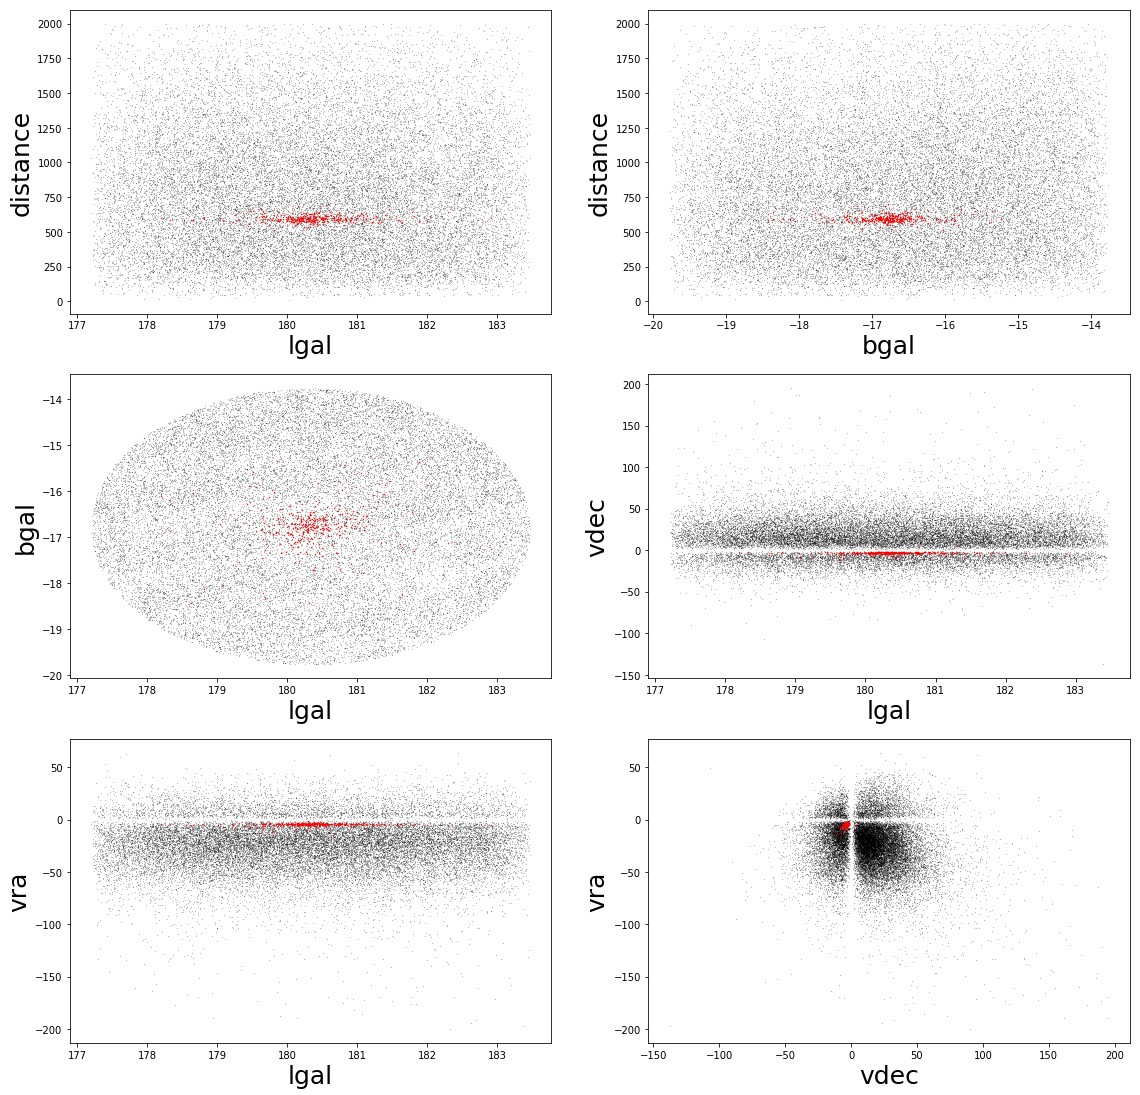

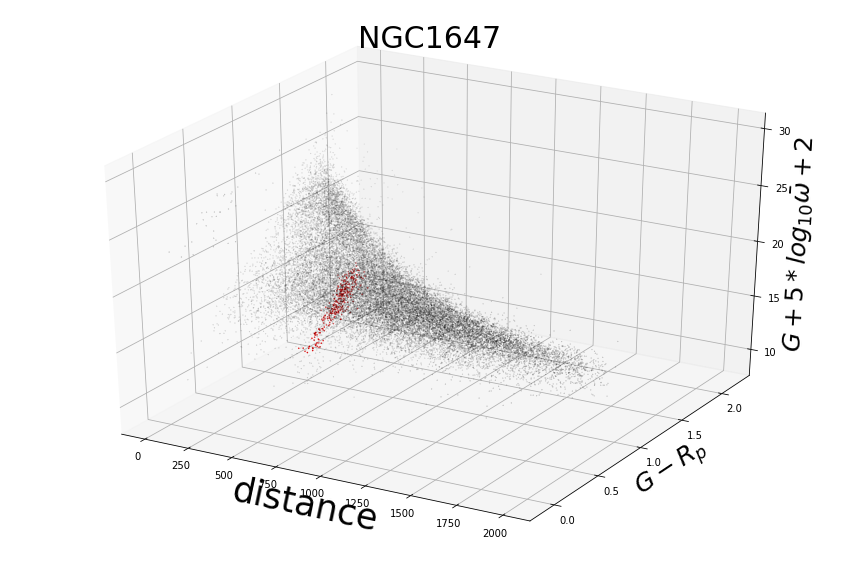

In [37]:
name_list = ["M67", "NGC2516", "NGC752", "NGC1039", "NGC1342", "NGC1647"]
clustername = "NGC752"
Dist = []
for clustername in name_list[1:] :

    print("For "+str(clustername))
    RADIUS       = 3.
    errtol       = 0.10
    weight       = [6,1,1,3,3,3,3,3];  weight=weight/np.max(weight)
    eps          = 0.15
    min_samples  = 15
    source = gu.source(clustername, RADIUS, errtol)
    source.read_votable()
    source.convert_filter_data()

    source.set_weight(weight)
    source.normalization_normal()

    ilabel = source.dbscan_labels(eps=0.18, min_samples=15, display=True)
    source.plot_information(0.01,False, HRD=False, ilabel=ilabel)
    source.plot_3D(0.01,False,(0,6,5),ilabel=ilabel)
    Dist.append(source.df[ilabel,0])

In [38]:
theorical_dist = [409, 457, 499, 640, 540]

In [39]:
for i, j in zip(Dist,[1,2,3,4,5]) :
    print("## For "+str(name_list[j])+"  (%d stars)"%len(i))
    print("# mean Dist:   %.1f"%np.mean(i))
    print("# median Dist: %.1f"%np.median(i))
    print("# theorical  : %d\n"%theorical_dist[j-1])

## For NGC2516  (2628 stars)
# mean Dist:   415.6
# median Dist: 414.4
# theorical  : 409

## For NGC752  (211 stars)
# mean Dist:   448.7
# median Dist: 447.7
# theorical  : 457

## For NGC1039  (152 stars)
# mean Dist:   514.3
# median Dist: 511.7
# theorical  : 499

## For NGC1342  (17 stars)
# mean Dist:   660.2
# median Dist: 660.9
# theorical  : 640

## For NGC1647  (306 stars)
# mean Dist:   595.9
# median Dist: 594.3
# theorical  : 540

